# Trabalho Final - MLOPs ()

Integrantes:

    1) Emerson Faria de Oliveira
    2) Tiago Muniz de Oliveira
    3) Caio Lima Uno
    4) Vinicius Vendrami Scocca

# 1) Exploração dos dados e modelos

## Import das libs

In [1]:
import pandas as pd
import numpy as np

In [2]:
# leitura dos dados
loan = pd.read_csv('./loan_default.csv')
loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
1,24932,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,...,EQUI,765,EXP,45-54,to_inst,NaN,North,direct,1,NaN
2,25039,2019,cf,Male,nopre,type2,p3,l1,nopc,b/c,...,EQUI,880,EXP,35-44,to_inst,NaN,North,direct,1,NaN
3,25101,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EQUI,880,EXP,45-54,to_inst,NaN,central,direct,1,NaN
4,25110,2019,cf,Male,nopre,type3,p3,l1,nopc,nob/c,...,EQUI,768,EXP,45-54,not_inst,NaN,North,direct,1,NaN


### Analise Geral do dataset (Valores nulos)

In [3]:
print(loan.info())
print(loan.isnull().sum())
loan['Status'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Status
0    112031
1     36639
Name: count, dtype: int64

### Drop das colunas não relevantes

In [4]:
loan = loan.drop([
                  'ID',
                  'Gender',
                  'rate_of_interest',
                  'Interest_rate_spread',
                  'Upfront_charges',
                ], axis=1
                )

In [5]:
print(loan.info())
loan.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   term                       148629 non-null  float64
 10  Neg_ammortization          148549 non-null  object 
 11  interest_only              148670 non-null  object 
 12  lump_sum_payment           148670 non-null  object 
 13  property_value             13

year                             0
loan_limit                    3344
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co_applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Security_Type                    0
Status                           0
dtir1               

### Analise da distribuição de classes da variavel target

In [6]:
loan['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [7]:
# loan.fillna({'property_value':loan['property_value'].median()}, inplace=True)
# loan.fillna({'income':loan['income'].median()}, inplace=True)
# loan.fillna({'term':loan['term'].median()}, inplace=True)
# loan.fillna({'LTV':loan['LTV'].median()}, inplace=True)
# loan.fillna({'dtir1':loan['dtir1'].median()}, inplace=True)

# loan['age'] = loan['age'].fillna(loan['age'].mode()[0])
# loan['loan_limit'] = loan['loan_limit'].fillna(loan['loan_limit'].mode()[0])
# loan['loan_purpose'] = loan['loan_purpose'].fillna(loan['loan_purpose'].mode()[0])
# loan['approv_in_adv'] = loan['approv_in_adv'].fillna(loan['approv_in_adv'].mode()[0])
# loan['Neg_ammortization'] = loan['Neg_ammortization'].fillna(loan['Neg_ammortization'].mode()[0])
# loan['submission_of_application'] = loan['submission_of_application'].fillna(loan['submission_of_application'].mode()[0])

# loan = loan[loan['LTV']<=300]
loan.isnull().sum()

year                             0
loan_limit                    3344
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co_applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Security_Type                    0
Status                           0
dtir1               

### Analise dos tipos das variaveis

In [8]:
loan.dtypes

year                           int64
loan_limit                    object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co_applicant_credit_type      object
age                           object
submission_of_application     object
LTV                          float64
Region                        object
Security_Type                 object
S

### Analise das classes das variaveis categoricas

In [9]:
print(loan['loan_type'].value_counts())
print()
print(loan['loan_limit'].value_counts())
print()
print(loan['approv_in_adv'].value_counts())
print()
print(loan['loan_purpose'].value_counts())
print()
print(loan['Neg_ammortization'].value_counts())
print()
print(loan['age'].value_counts())
print()
print(loan['submission_of_application'].value_counts())
print()
print(loan['Credit_Worthiness'].value_counts())
print()
print(loan['open_credit'].value_counts())
print()
print(loan['business_or_commercial'].value_counts())
print()
print(loan['interest_only'].value_counts())
print()
print(loan['lump_sum_payment'].value_counts())
print()
print(loan['construction_type'].value_counts())
print()
print(loan['occupancy_type'].value_counts())
print()
print(loan['Secured_by'].value_counts())
print()
print(loan['total_units'].value_counts())
print()
print(loan['credit_type'].value_counts())
print()
print(loan['co_applicant_credit_type'].value_counts())
print()
print(loan['Region'].value_counts())
print()
print(loan['Security_Type'].value_counts())
print()


loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64

loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64

Neg_ammortization
not_neg    133420
neg_amm     15129
Name: count, dtype: int64

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64

submission_of_application
to_inst     95814
not_inst    52656
Name: count, dtype: int64

Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64

open_credit
nopc    148114
opc        556
Name: count, dtype: int64

business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64

interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64

lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64


## Visualização das distribuições dos dados (Numericos)

In [10]:
loan.drop(['year'], axis=1, inplace=True)

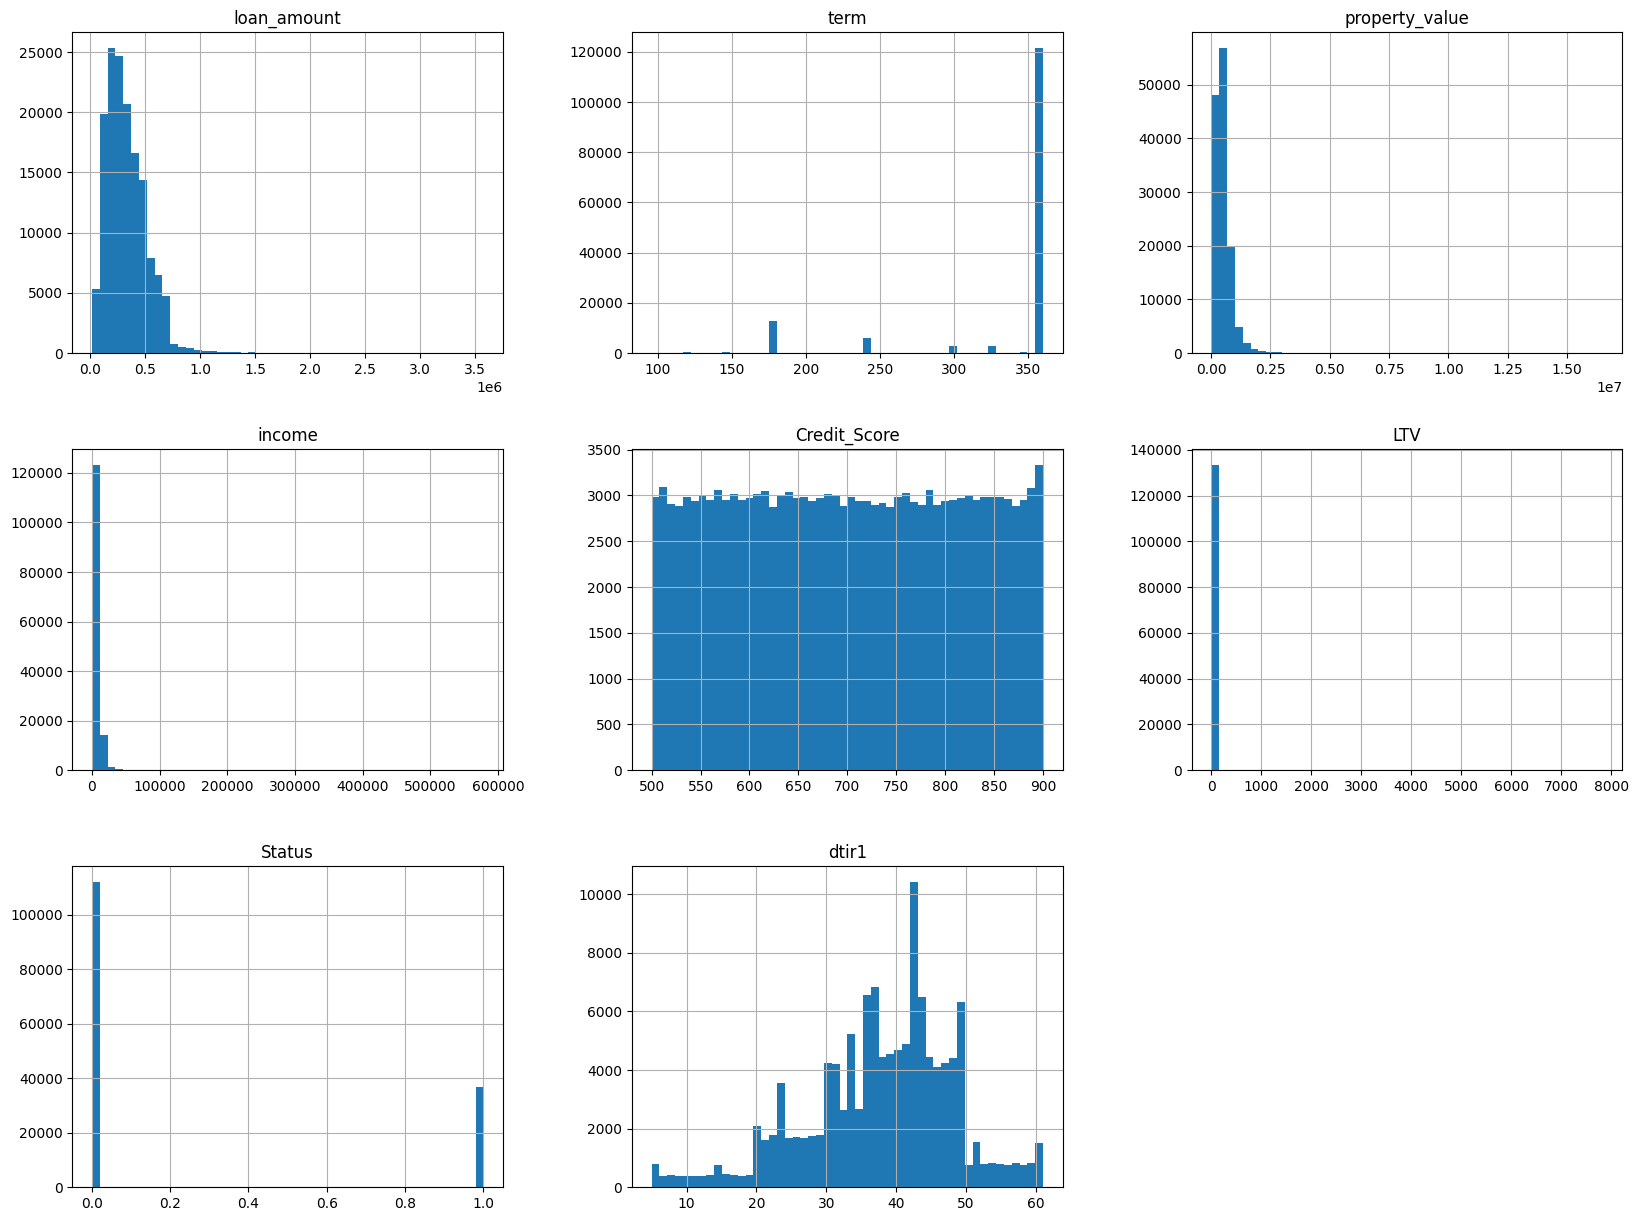

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
loan.hist(bins=50, figsize=(20, 15))
plt.show()

### Matrix de correlação para checar correlação linear entre as features

In [12]:
loan_numerical = loan.copy()
loan_numerical.drop(['loan_type','Neg_ammortization','loan_limit','approv_in_adv','age','submission_of_application','loan_purpose','Credit_Worthiness','open_credit','business_or_commercial','interest_only','lump_sum_payment','construction_type','occupancy_type','Secured_by','total_units','credit_type','co_applicant_credit_type','Region','Security_Type'], axis=1, inplace=True)

corr = loan_numerical.corr()
corr

,loan_amount,term,property_value,income,Credit_Score,LTV,Status,dtir1
loan_amount,1.000000,0.174474,0.734249,0.456065,0.004438,0.038869,-0.036825,0.015029
term,0.174474,1.000000,0.045117,-0.053785,-0.003149,0.106834,-0.000240,0.110572
property_value,0.734249,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.048864,-0.056288
income,0.456065,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.065119,-0.267807
Credit_Score,0.004438,-0.003149,0.002430,0.000802,1.000000,-0.005533,0.004004,-0.000313
LTV,0.038869,0.106834,-0.215102,-0.066203,-0.005533,1.000000,0.038895,0.156557
Status,-0.036825,-0.000240,-0.048864,-0.065119,0.004004,0.038895,1.000000,0.078083
dtir1,0.015029,0.110572,-0.056288,-0.267807,-0.000313,0.156557,0.078083,1.000000


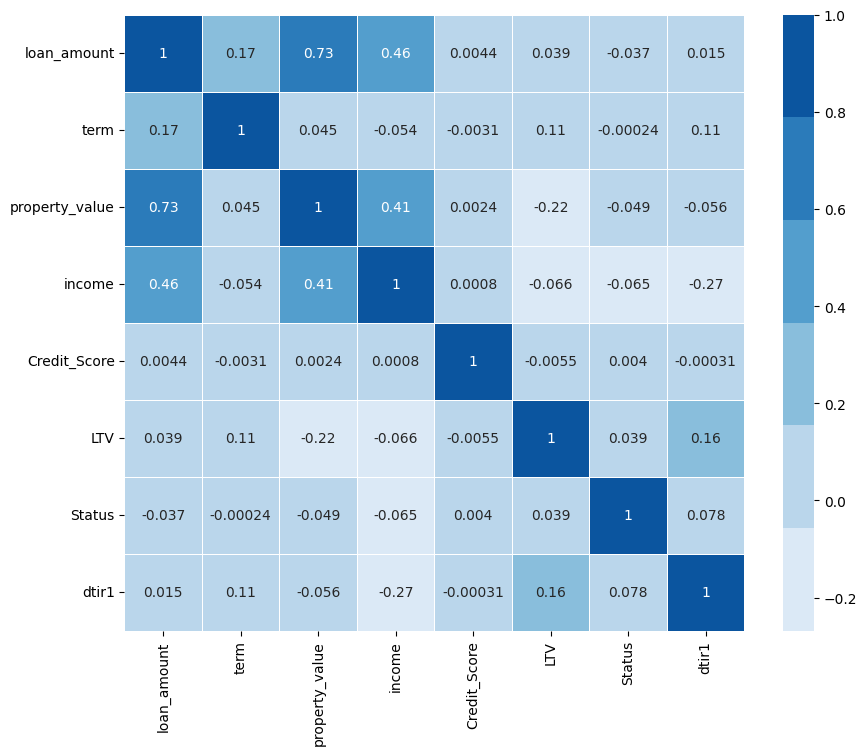

In [13]:
#Vamos ver a correlação graficamente
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

## Preparação do dataset para o treinamento do modelo
* 80% treino
* 20% validação

### Aplicando tecnicas de undersampling na classe majoritaria

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = loan.drop("Status", axis=1)
y = loan["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersampling the majority class
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [15]:
y_res.value_counts()

Status
0    29335
1    29335
Name: count, dtype: int64

### Criação do pipeline de pre-processamento dos dados

* Variaveis Numéricas: StandardScaler
* Variaveis Categoricas: OneHotEncoder

In [16]:
X.dtypes

loan_limit                    object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co_applicant_credit_type      object
age                           object
submission_of_application     object
LTV                          float64
Region                        object
Security_Type                 object
dtir1                        float64
d

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_attribs = ["loan_amount","term","property_value","income","Credit_Score","LTV","dtir1"]
cat_attribs = ["loan_type","loan_limit","approv_in_adv","loan_purpose","Neg_ammortization","age","submission_of_application","Credit_Worthiness","open_credit","business_or_commercial","interest_only","lump_sum_payment","occupancy_type","total_units","credit_type","co_applicant_credit_type","Region"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Adiciona mediana para valores faltantes
    ('std_scaler', RobustScaler())                  # Escalonamento robusto
])

# Pipeline para variáveis categóricas: imputar a moda e, em seguida, aplicar one-hot encoding
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Adiciona a moda para valores faltantes
    ('one_hot_encoder', OneHotEncoder())                    # Transformação one-hot
])

# ColumnTransformer para processar variáveis numéricas e categóricas
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_res)
X_test_prepared = full_pipeline.transform(X_test)


## Parametros a serem otimizados pelo grid-search:
1. **n_estimators**: Este parâmetro é equivalente em todos os três modelos. Ele especifica o número de árvores de decisão na floresta ou conjunto. Em todos os casos, um número maior de árvores pode melhorar a precisão do modelo, mas também aumenta o tempo de computação e o risco de overfitting.

2. **max_depth (Random Forest e XGBoost) / num_leaves (LightGBM)**: Estes parâmetros controlam a complexidade das árvores individuais, mas são definidos de maneira diferente.
    * Random Forest e XGBoost (max_depth): Representa a profundidade máxima de cada árvore. Uma árvore mais profunda pode capturar mais variações dos dados, mas também pode levar a um overfitting.
    * LightGBM (num_leaves): Representa o número máximo de folhas (ou nós terminais) que uma árvore pode ter. Uma árvore com mais folhas será mais complexa. num_leaves é um conceito diferente de max_depth, mas ambos servem para controlar a complexidade da árvore.  
<br>
3. **learning_rate (XGBoost e LightGBM)**: Este parâmetro é específico para modelos de boosting, como XGBoost e LightGBM, e não se aplica ao Random Forest. Ele controla a taxa na qual o modelo aprende. Valores menores de learning_rate requerem mais árvores (maior n_estimators) para manter a mesma precisão, mas podem resultar em um modelo mais generalizado.

In [18]:
# Importando o Make Scorer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import numpy as np

# Importando os módulos de cálculo de métricas
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(fbeta_score, beta = 1)}


# Definição dos espaços de parâmetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20, 30]
}

param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 62, 127],
}

# Configuração do GridSearchCV para cada modelo
grid_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=param_grid_rf, 
                        cv=3, 
                        scoring=meus_scores,
                        refit='precision')

grid_xgb = GridSearchCV(estimator=XGBClassifier(), 
                        param_grid=param_grid_xgb, 
                        cv=3, 
                        scoring=meus_scores,
                        refit='precision')

grid_lgb = GridSearchCV(estimator=LGBMClassifier(), 
                        param_grid=param_grid_lgb, 
                        cv=3, 
                        scoring=meus_scores,
                        refit='precision')



# Ajuste aos dados
grid_rf.fit(X_train_prepared, y_res)
grid_xgb.fit(X_train_prepared, y_res)
grid_lgb.fit(X_train_prepared, y_res)

[LightGBM] [Info] Number of positive: 19557, number of negative: 19556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 39113, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500013 -> initscore=0.000051
[LightGBM] [Info] Start training from score 0.000051
[LightGBM] [Info] Number of positive: 19556, number of negative: 19557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 39113, number of used features: 56
[LightGBM] [Info] [b

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 62, 127]},
             refit='precision',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(fbeta_score, response_method='predict', beta=1),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [19]:
pd.DataFrame(grid_rf.cv_results_)[['params',
                                  'mean_test_accuracy',
                                  'mean_test_recall',
                                  'mean_test_precision',
                                  'mean_test_f1']]

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'max_depth': 10, 'n_estimators': 100}",0.803971,0.686041,0.897879,0.777723
1,"{'max_depth': 10, 'n_estimators': 200}",0.804755,0.687439,0.898231,0.778762
2,"{'max_depth': 10, 'n_estimators': 300}",0.804500,0.686041,0.899119,0.778173
3,"{'max_depth': 20, 'n_estimators': 100}",0.815204,0.725584,0.884090,0.796985
4,"{'max_depth': 20, 'n_estimators': 200}",0.815817,0.725004,0.885922,0.797396
5,"{'max_depth': 20, 'n_estimators': 300}",0.817351,0.727459,0.886956,0.799276
6,"{'max_depth': 30, 'n_estimators': 100}",0.814522,0.734618,0.874373,0.798393
7,"{'max_depth': 30, 'n_estimators': 200}",0.815988,0.736901,0.875408,0.800175
8,"{'max_depth': 30, 'n_estimators': 300}",0.816653,0.737106,0.876583,0.800784


In [20]:
pd.DataFrame(grid_xgb.cv_results_)[['params',
                                  'mean_test_accuracy',
                                  'mean_test_recall',
                                  'mean_test_precision',
                                  'mean_test_f1']]

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.810977,0.697563,0.902323,0.786752
1,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.815954,0.706392,0.904623,0.793289
2,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.818118,0.714880,0.900902,0.797158
3,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.807534,0.729811,0.864205,0.791313
4,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.809136,0.730493,0.866873,0.792841
5,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.810738,0.732027,0.868833,0.794561
6,"{'learning_rate': 0.01, 'max_depth': 30, 'n_es...",0.802318,0.740379,0.845113,0.789263
7,"{'learning_rate': 0.01, 'max_depth': 30, 'n_es...",0.807227,0.741197,0.853988,0.793599
8,"{'learning_rate': 0.01, 'max_depth': 30, 'n_es...",0.808982,0.739151,0.859162,0.794641
9,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.820658,0.736083,0.885933,0.804078


In [21]:
pd.DataFrame(grid_lgb.cv_results_)[['params',
                                  'mean_test_accuracy',
                                  'mean_test_recall',
                                  'mean_test_precision',
                                  'mean_test_f1']]

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.806886,0.709596,0.881023,0.786061
1,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.811284,0.713005,0.887522,0.790668
2,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.813959,0.719653,0.887002,0.794553
3,"{'learning_rate': 0.01, 'n_estimators': 200, '...",0.812903,0.709358,0.894625,0.791276
4,"{'learning_rate': 0.01, 'n_estimators': 200, '...",0.817062,0.716721,0.896674,0.796624
5,"{'learning_rate': 0.01, 'n_estimators': 200, '...",0.817351,0.723880,0.890329,0.798501
6,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.816670,0.717062,0.895444,0.796373
7,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.818698,0.721323,0.895769,0.799112
8,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.818919,0.727050,0.890704,0.800591
9,"{'learning_rate': 0.1, 'n_estimators': 100, 'n...",0.822192,0.734413,0.890793,0.805071


### Resultado dos melhores parametros e metricas apos o seach (Trainig Set)

In [22]:
# Resultados utilizando o RMSE
best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_
best_params_xgb = grid_xgb.best_params_
best_score_xgb = grid_xgb.best_score_
best_params_lgb = grid_lgb.best_params_
best_score_lgb = grid_lgb.best_score_

# Minimizar o numero de maus pagadores serem classificados como bons pagadores (Precision)
print("Melhores parâmetros para Random Forest:\n", best_params_rf, "\nprecision:", best_score_rf)
print("")
print("Melhores parâmetros para XGBoost:\n", best_params_xgb, "\nprecision:", best_score_xgb)
print("")
print("Melhores parâmetros para LightGBM:\n", best_params_lgb, "\nprecision:", best_score_lgb)

Melhores parâmetros para Random Forest:
 {'max_depth': 10, 'n_estimators': 300} 
precision: 0.899118988722484

Melhores parâmetros para XGBoost:
 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200} 
precision: 0.9046230012183281

Melhores parâmetros para LightGBM:
 {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 62} 
precision: 0.8966744230355341


### Avaliando os modelos (Test Set)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     22430
           1       0.76      0.70      0.72      7304

    accuracy                           0.87     29734
   macro avg       0.83      0.81      0.82     29734
weighted avg       0.87      0.87      0.87     29734



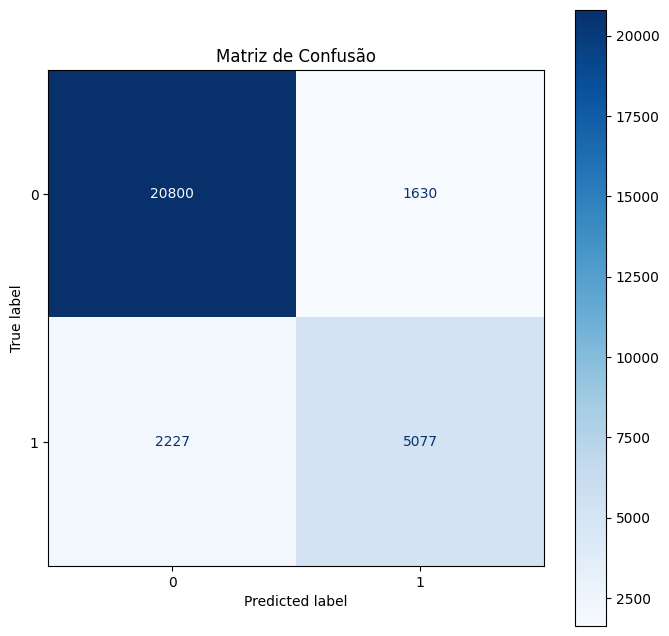

In [23]:
# Previsões com os melhores modelos
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test_prepared)

# Calculando o RMSE para cada modelo
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_xgb))

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_xgb)

# Visualizando a matriz de confusão
fig, ax = plt.subplots(figsize=(8, 8))  # Ajusta o tamanho da figura
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_xgb.best_estimator_.classes_)
disp.plot(cmap='Blues', ax=ax)  # Escolha de um colormap
ax.set_title('Matriz de Confusão')
plt.show()

Minimizar o numero de maus pagadores serem classificados como bons pagadores (Precision)

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Acc:",accuracy_score(y_test, y_pred_xgb))
print("precision:",precision_score(y_test, y_pred_xgb))
print("recall:",recall_score(y_test, y_pred_xgb))
print("f1:",f1_score(y_test, y_pred_xgb))

Acc: 0.8702831775072308
precision: 0.7569703295064858
recall: 0.6950985761226726
f1: 0.7247162943401613


# 2) Pipeline para o modelo campeão e export do model1.pkl

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

In [12]:
# leitura dos dados
loan = pd.read_csv('./loan_default.csv')
loan.head()

# Remove outliers de LTV
# loan = loan[loan['LTV']<=300]

# Variavel target
X = loan.drop("Status", axis=1)
y = loan["Status"]

# Split dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# undersampling a classe majoritaria
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

# Separação das variaveis categoricas e numericas para o tratamento de dados no pipeline
num_attribs = ["loan_amount","term","property_value","income","Credit_Score","LTV","dtir1"]
cat_attribs = ["loan_type","loan_limit","approv_in_adv","loan_purpose","Neg_ammortization","age","submission_of_application","Credit_Worthiness","open_credit","business_or_commercial","interest_only","lump_sum_payment","occupancy_type","total_units","credit_type","co_applicant_credit_type","Region"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Adiciona mediana para valores faltantes
    ('std_scaler', RobustScaler())                  # Escalonamento robusto
])

# Pipeline para variáveis categóricas: imputar a moda e, em seguida, aplicar one-hot encoding
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Adiciona a moda para valores faltantes
    ('one_hot_encoder', OneHotEncoder())                    # Transformação one-hot
])

# ColumnTransformer para processar variáveis numéricas e categóricas
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

# Criando o pipeline final que inclui o ColumnTransformer e o modelo de machine learning
final_pipeline = Pipeline([
    ('preprocessor', full_pipeline),
    # ('model', grid_lgb.best_estimator_)  # Adicionando o modelo ao pipeline
    # ('model', LGBMClassifier(learning_rate= 0.1, n_estimators=200, num_leaves=31))  # Adicionando o modelo ao pipeline
    ('model', XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=200))  # Adicionando o modelo ao pipeline
])

final_pipeline.fit(X_res, y_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   RobustScaler())]),
                                                  ['loan_amount', 'term',
                                                   'property_value', 'income',
                                                   'Credit_Score', 'LTV',
                                                   'dtir1']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [13]:
y_test_pred = final_pipeline.predict(X_test)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     22430
           1       0.76      0.70      0.72      7304

    accuracy                           0.87     29734
   macro avg       0.83      0.81      0.82     29734
weighted avg       0.87      0.87      0.87     29734



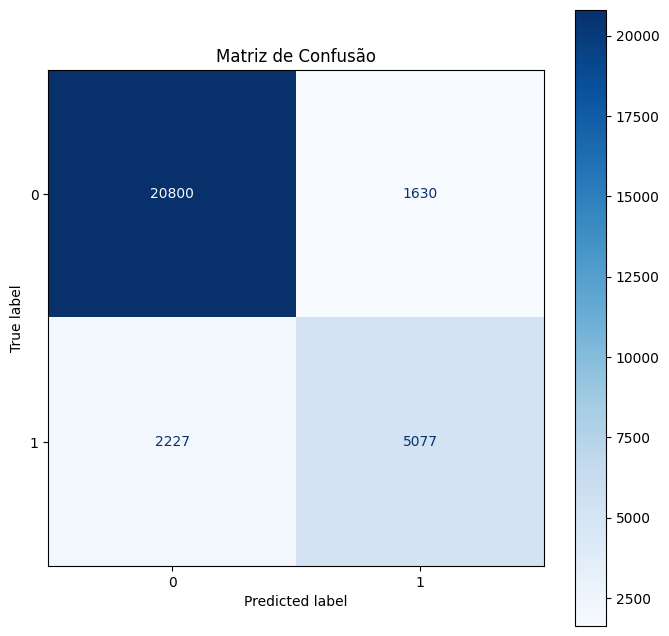

Acc: 0.8702831775072308
precision: 0.7569703295064858
recall: 0.6950985761226726
f1: 0.7247162943401613


In [14]:
# Printando o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred))

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)

# Visualizando a matriz de confusão
fig, ax = plt.subplots(figsize=(8, 8))  # Ajusta o tamanho da figura
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_pipeline.classes_)
disp.plot(cmap='Blues', ax=ax)  # Escolha de um colormap
ax.set_title('Matriz de Confusão')
plt.show()

print("Acc:",accuracy_score(y_test, y_test_pred))
print("precision:",precision_score(y_test, y_test_pred))
print("recall:",recall_score(y_test, y_test_pred))
print("f1:",f1_score(y_test, y_test_pred))

In [15]:
import joblib

# Salvando o pipeline treinado para um arquivo usando joblib
filename = "../models/model1.joblib"
joblib.dump(value=final_pipeline, filename=filename)

['../models/model1.joblib']